# Transfer Learning Inceptionv3 MNIST Data

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3  # InceptionV1 is not directly available in Keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [4]:
# Expand MNIST grayscale images to 3 channels (RGB)
train_images = np.repeat(train_images[..., np.newaxis], 3, axis=-1)
test_images = np.repeat(test_images[..., np.newaxis], 3, axis=-1)

In [5]:
train_images.shape

(60000, 28, 28, 3)

In [6]:
# Resize images to 75x75 pixels, as InceptionV1 expects larger input sizes (default is 299x299)
train_images = tf.image.resize(train_images, (75, 75))
test_images = tf.image.resize(test_images, (75, 75))

In [7]:
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
# One-hot encoding of labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [17]:
# Load pre-trained InceptionV3 (using InceptionV3 since InceptionV1 isn't available in Keras)
# Set `include_top=False` to exclude the fully connected layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze the base model layers (do not train them)
base_model.trainable = False

In [18]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 75, 75, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_188 (Conv2D)           │ (None, 37, 37, 32)        │             864 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_188       │ (None, 37, 37, 32)        │              96 │ conv2d_188[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_188 (Activation)   │ (None, 37, 37, 32)        │               0 │ batch_normalization_188[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_189 (Conv2D)           │ (None, 35, 35, 32)        │           9,216 │ activation_188[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_189       │ (None, 35, 35, 32)        │              96 │ conv2d_189[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_189 (Activation)   │ (None, 35, 35, 32)        │               0 │ batch_normalization_189[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_190 (Conv2D)           │ (None, 35, 35, 64)        │          18,432 │ activation_189[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_190       │ (None, 35, 35, 64)        │             192 │ conv2d_190[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_190 (Activation)   │ (None, 35, 35, 64)        │               0 │ batch_normalization_190[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_8               │ (None, 17, 17, 64)        │               0 │ activation_190[0][0]       │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_191 (Conv2D)           │ (None, 17, 17, 80)        │           5,120 │ max_pooling2d_8[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_191       │ (None, 17, 17, 80)        │             240 │ conv2d_191[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_191 (Activation)   │ (None, 17, 17, 80)        │               0 │ batch_normalization_191[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_192 (Conv2D)           │ (None, 15, 15, 192)       │         138,24

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [19]:
# Create custom output layers
x = base_model.output
x = Flatten()(x)  # Flatten the output from the convolutional layers
x = Dense(128, activation='relu')(x)  # Fully connected layer
output = Dense(10, activation='softmax')(x)  # Output layer for 10 classes (MNIST)

In [20]:
# Create the model
model = Model(inputs=base_model.input, outputs=output)

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 150s 154ms/step - accuracy: 0.8363 - loss: 0.5053 - val_accuracy: 0.9258 - val_loss: 0.2336
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 149ms/step - accuracy: 0.9336 - loss: 0.1991 - val_accuracy: 0.9388 - val_loss: 0.1889
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 138s 148ms/step - accuracy: 0.9462 - loss: 0.1640 - val_accuracy: 0.9352 - val_loss: 0.1994
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 135s 144ms/step - accuracy: 0.9516 - loss: 0.1405 - val_accuracy: 0.9405 - val_loss: 0.1808
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 130s 139ms/step - accuracy: 0.9594 - loss: 0.1195 - val_accuracy: 0.9449 - val_loss: 0.1680


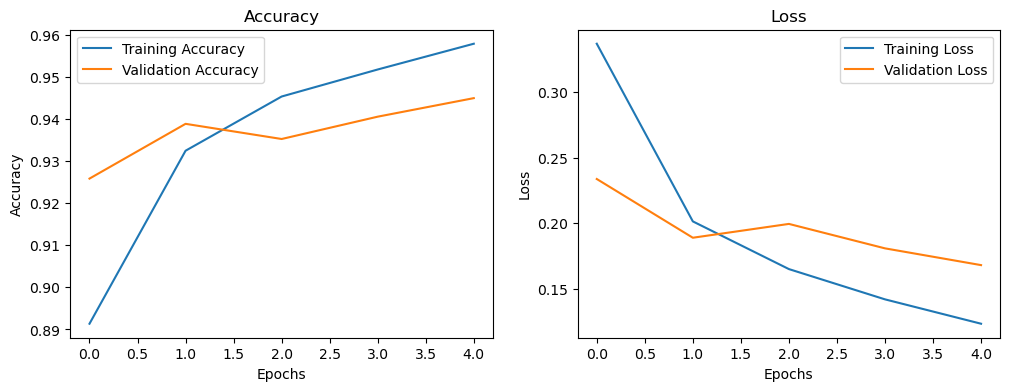

In [23]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


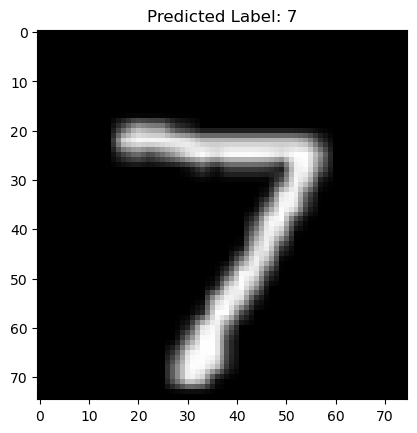

In [24]:
# Predict on a single test image
test_image = test_images[0:1]  # Take the first image from the test set
prediction = model.predict(test_image)

# Show the test image and the predicted label
plt.imshow(test_image[0], cmap='gray')
plt.title(f"Predicted Label: {np.argmax(prediction)}")
plt.show()

# Fine Tuning Inceptionv3 MNIST Data

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [22]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [23]:
# Preprocess the data
# Inception expects 3-channel images, so we expand grayscale (1-channel) MNIST images to 3 channels
train_images = np.repeat(train_images[..., np.newaxis], 3, axis=-1)
test_images = np.repeat(test_images[..., np.newaxis], 3, axis=-1)

In [24]:
# Resize images to 75x75 pixels (original size for Inception is 299x299, but smaller can be used to save computation)
train_images = tf.image.resize(train_images, (75, 75))
test_images = tf.image.resize(test_images, (75, 75))

In [25]:
# Normalize pixel values (InceptionV3 was trained on images with pixel values in range [-1, 1])
train_images = train_images / 127.5 - 1
test_images = test_images / 127.5 - 1

In [26]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [27]:
# Load the pre-trained InceptionV3 model without the top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

In [28]:
# Freeze the base model layers (to prevent them from being trained initially)
base_model.trainable = False

In [29]:
# Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer to reduce the feature map dimensions
x = Dense(128, activation='relu')(x)  # Fully connected layer
output = Dense(10, activation='softmax')(x)  # Output layer for MNIST (10 classes)

In [30]:
# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train only the new layers (the custom layers)
history = model.fit(train_images, train_labels, epochs=1, batch_size=64, validation_data=(test_images, test_labels))

938/938 ━━━━━━━━━━━━━━━━━━━━ 148s 151ms/step - accuracy: 0.8373 - loss: 0.5026 - val_accuracy: 0.9185 - val_loss: 0.2449


In [32]:
# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True

# Fine-tune the model (this step will update some of the InceptionV3 layers and the custom layers)
# Only fine-tune layers after block 6
# The InceptionV3 architecture has 317 layers in total
for layer in base_model.layers[:249]:
    layer.trainable = False
for layer in base_model.layers[249:]:
    layer.trainable = True

# Compile the model again with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model (train with more layers unfreezed)
fine_tune_history = model.fit(train_images, train_labels, epochs=1, batch_size=64, validation_data=(test_images, test_labels))

938/938 ━━━━━━━━━━━━━━━━━━━━ 420s 436ms/step - accuracy: 0.6783 - loss: 1.1784 - val_accuracy: 0.9282 - val_loss: 0.2341


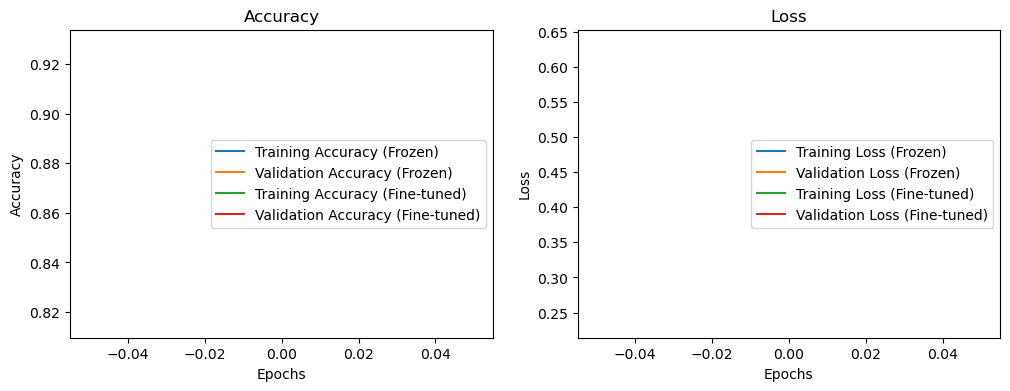

In [33]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy (Frozen)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Frozen)')
plt.plot(fine_tune_history.history['accuracy'], label='Training Accuracy (Fine-tuned)')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy (Fine-tuned)')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss (Frozen)')
plt.plot(history.history['val_loss'], label='Validation Loss (Frozen)')
plt.plot(fine_tune_history.history['loss'], label='Training Loss (Fine-tuned)')
plt.plot(fine_tune_history.history['val_loss'], label='Validation Loss (Fine-tuned)')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [37]:
# Predict on a test image
test_image = test_images[0:1]  # Select a test image
prediction = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


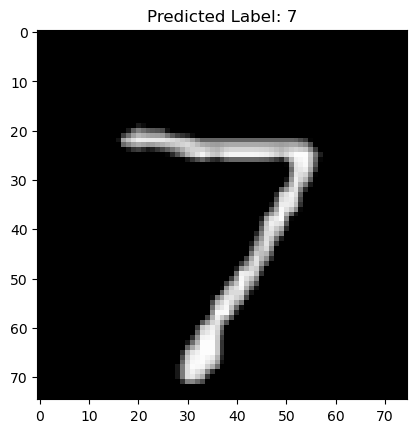

In [38]:
# Show the test image and the predicted label
plt.imshow(test_image[0], cmap='gray')
plt.title(f"Predicted Label: {np.argmax(prediction)}")
plt.show()

# Transfer Learning Resnet50 MNIST Data

In [66]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Add, BatchNormalization, Activation, Input, Flatten
from tensorflow.keras.models import Model

# Function to load a sample image from the ImageNet dataset
def load_imagenet_sample():
    # Load a small subset of ImageNet (ImageNet2012 validation set)
    dataset, info = tfds.load('imagenet_v2', split='test', with_info=True)
    
    # Get one image and label from the dataset
    for sample in dataset.take(1):
        image = sample['image']
        label = sample['label']
    
    return image, label

# Preprocess image to 224x224 as ResNet50 expects this size
def preprocess_image(image):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1] range
    return image

# Display the image
def display_image(image, label):
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()



In [67]:
# Define the ResNet Bottleneck block from the previous example
def resnet_bottleneck_block(input_tensor):
    x = Conv2D(64, (1, 1), strides=(1, 1), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(256, (1, 1), strides=(1, 1))(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the model that includes the initial 7x7 Conv and MaxPool
def build_resnet_block_model():
    input_tensor = Input(shape=(224, 224, 3))  # ImageNet input size

    # Initial convolution layer with 7x7 kernel and max pooling
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Apply the bottleneck block
    x = resnet_bottleneck_block(x)

    # Create the model
    model = Model(inputs=input_tensor, outputs=x)
    return model

# Load and preprocess an ImageNet sample
image, label = load_imagenet_sample()
preprocessed_image = preprocess_image(image)

# Display the original image
display_image(image, label)

# Build the ResNet block model
model = build_resnet_block_model()

# Expand dimensions to create a batch of one image
image_batch = tf.expand_dims(preprocessed_image, axis=0)

# Run the model on the preprocessed image
output = model.predict(image_batch)

# Display the output (feature maps from the ResNet block)
print("Output Feature Map Shape:", output.shape)

# Plot the output feature maps (selecting the first 16 feature maps for display)
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(output[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

ExtractError: Error while extracting C:\Users\Milan Amrut Joshi\tensorflow_datasets\downloads\hugg.co_data_vais_Imag_reso_main_imag-m8MN_35JZFrGeoTI82aIgjNtpWbosMu7yp_w5ODXJynw.tar.gz to C:\Users\Milan Amrut Joshi\tensorflow_datasets\downloads\extracted\TAR_GZ.hugg.co_data_vais_Imag_reso_main_imag-m8MN_35JZFrGeoTI82aIgjNtpWbosMu7yp_w5ODXJynw.tar.gz: [WinError 206] The filename or extension is too long: 'C:\\Users\\Milan Amrut Joshi\\tensorflow_datasets\\downloads\\extracted\\incomplete.7ea4346a42b541338253163b237b335f_TAR_GZ.hugg.co_data_vais_Imag_reso_main_imag-m8MN_35JZFrGeoTI82aIgjNtpWbosMu7yp_w5ODXJynw.tar.gz\\imagenetv2-matched-frequency-format-val\\986'
On windows, path lengths greater than 260 characters may result in an error. See the doc to remove the limitation: https://docs.python.org/3/using/windows.html#removing-the-max-path-limitation

In [65]:
!pip install tensorflow-datasets --user

  Obtaining dependency information for tensorflow-datasets from https://files.pythonhosted.org/packages/8f/50/52fa3d41d20c687d81f66338bc1b0e71a27a3390ecfa8f5bc212a10135e1/tensorflow_datasets-4.9.6-py3-none-any.whl.metadata
  Using cached tensorflow_datasets-4.9.6-py3-none-any.whl.metadata (9.5 kB)
  Obtaining dependency information for immutabledict from https://files.pythonhosted.org/packages/e2/13/3cf4ac5b3403f3456e645c4533883ef67b1bb0c72e56b79c707715f57a74/immutabledict-4.2.0-py3-none-any.whl.metadata
  Using cached immutabledict-4.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached promise-2.3-py3-none-any.whl
  Obtaining dependency information for simple-parsing from https://files.pythonhosted.org/packages/f8/62/0194ea1d8245d76bfd2d5c6bebec7f824af00a6e03bec22697d12712fff0/simple_parsing-0.1.6-py3-none-any.whl.metadata
  Using cached simple_parsing-0.1.6-py3-none-any.whl.metadata (7.3 kB)
  Obtaining dependency information for tensorflow-metadata from https://files.pythonhosted.o

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
